<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1>Does Wedding Vendor Pricing Positively Affect Customer Satisfaction?</h1><br>
<em>DAT-7470 Wedding Vendors Analysis</em><br>

Written by Stefano Compagnone <br>
Hult International Business School <br>
<a href="https://github.com/stefagnone">https://github.com/stefagnone</a>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Problem Introduction</h2><br>
Imagine the anticipation of your customer: The wedding day, a mosaic of dreams and meticulous planning. Amidst this excitement, a key question arises: does investing in more expensive wedding services guarantee a more satisfying experience? This analysis examines the intricate dance between wedding service provider prices and customer satisfaction.

Here, "price" is not just a number but a spectrum - from inexpensive to affordable to moderate to luxurious - framed by Parducci's (1965) range-frequency theory. This theory states that consumers do not evaluate prices on a linear scale but through comparisons within categorized price ranges.

Meanwhile, "customer satisfaction" goes beyond mere approval ratings and is captured by a five-star rating system that reflects customer sentiment - a concept reiterated by Bigne et al. (2023).

By navigating these dimensions, this study aims to determine whether a higher price category for wedding services is a harbinger of greater happiness or whether satisfaction flourishes regardless of cost.

<h2>Challenging Conventional Wisdom: Price and Satisfaction Not Correlated</h2><br>
No statistically significant correlation exists between the price categories of affordable (-0.04), moderate (0.03), and luxury (-0.01) vendors and their associated customer satisfaction rating, as p-values are all above 40%. This finding challenges the conventional assumption that higher pricing, often associated with perceived higher quality, correlates with increased customer satisfaction.

This outcome suggests that higher pricing does not inherently lead to enhanced customer satisfaction, potentially due to the elevated expectations that accompany higher prices. Hence, businesses might reconsider strategies emphasizing premium pricing to enhance customer satisfaction. Instead, the focus should shift towards understanding the specific attributes and factors that drive customer satisfaction within each pricing category, thereby aligning business strategies more effectively with customer needs and preferences.

<h2>The Disproportionate Influence of Top Vendors</h2><br>
The top 4.52% of all vendors with the most reviews (20 vendors) hold 37.56% of the total sample reviews, indicating that only a few providers receive a disproportionately high number of ratings, which suggests a concentration of popularity or satisfaction among a small group of offerings. To capitalize on this insight, companies should focus on understanding the unique characteristics of these providers. Analyzing what differentiates these providers can provide important clues for improving services or products. For example, companies could investigate whether these popular offerings share common characteristics such as superior quality, exceptional service, or customer retention strategies.

In fact, a study shows that the optimal star rating for businesses generating the most amount of revenue is between 3.5 and 4.5 stars (Womply, n.d.). No wonder those top 20 are within this category with an average rating of 4.24, which is substantially below average.

<h2>Personalization Over Volume for Better Ratings</h2><br>
A strategic reorientation is imperative for optimizing customer review solicitation, given the identified negative correlation of -0.42 between customer ratings and the volume of reviews.

Integrating insights from an eye-tracking study (Chen et al., 2022) focused on online reviews with strategies for enhancing customer review collection elucidates that prioritizing high-quality, predominantly positive reviews is more efficacious than merely amassing a substantial quantity of reviews. Notably, the data indicates that women exhibit a heightened sensitivity to negative comments, substantially impacting their purchasing decisions.

This revelation underscores the criticality of soliciting reviews, particularly from customers with exceedingly positive experiences, as such reviews are more likely to instill confidence in prospective buyers. Furthermore, customizing feedback requests to acknowledge each customer's experience can yield more authentic and favorable reviews. A nuanced strategy that emphasizes the quality of customer reviews over their quantity can profoundly influence customer behavior and augment overall customer satisfaction.

<h2>Technical Analysis</h2><br>
In the subsequent section, the technical analysis that forms the basis for the above conclusions is presented.

In [1]:
# importing relevant packages
import pandas            as pd  # data science 
import matplotlib.pyplot as plt # data visualization
import seaborn           as sns # enhanced data visualization
from scipy import stats         # to run statistical tests

In [2]:
# specifying the dataset (the file is in the same folder as the script)
file = "weddings.xlsx"

# specifying data types with a dictionary
data_types = {"department":                str,
              "reviews":                   int,
              "avg_stars":               float,
              "affordability":             str,
              "price_cat":                 int,
              # "inexpensive":            bool, omitted to handle collinearity
              "affordable":               bool,
              "moderate":                 bool,
              "luxury":                   bool,
               }

# Reading in dataset
df = pd.read_excel(io         = file      ,       
                   sheet_name = "weddings", 
                   header     = 0         ,          
                   dtype      = data_types)   # applying data types

In [3]:
# Checking observations by department to assess representation (n>= 30)
df.loc[:,"department"].value_counts(ascending = True).head(n = 5)

department
invitations    26
jewelry        30
rentals        30
cake           31
flowers        32
Name: count, dtype: int64

The invitations department has collected fewer than 30 observations. Subsequently, as the condition n >= 30 is not fulfilled in all cases, the central limit theorem cannot be applied and a department level analysis is not possible. No null values are apparent in price category, reviews, and star rating.

In [4]:
# Getting a quick grasp of the data used for analysis
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     442 non-null    object 
 1   reviews        442 non-null    int64  
 2   avg_stars      442 non-null    float64
 3   affordability  442 non-null    object 
 4   price_cat      442 non-null    int64  
 5   affordable     442 non-null    bool   
 6   moderate       442 non-null    bool   
 7   luxury         442 non-null    bool   
dtypes: bool(3), float64(1), int64(2), object(2)
memory usage: 18.7+ KB


In [5]:
# Collection of summary statistics
desc_stats_numbers = df.describe(include = "number").round(decimals = 2)

# filtering relevant statistics
desc_stats_numbers.loc[("mean","50%","min","max"),
                       ("reviews","avg_stars","price_cat")]

,reviews,avg_stars,price_cat
mean,149.65,4.69,2.26
50%,60.00,4.90,2.00
min,1.00,1.90,1.00
max,4108.00,5.00,4.00


As can be seen from the descriptive statistics above, the median number of reviews falls at 60, implying a right skewed distribution.

Further, average customer satisfaction across all aspects of wedding services is very high, with an average star rating of 4.69, which makes sense as reviews are naturally very positive. On the other hand, the median price category of 2 implies that most wedding services available are affordable. For a more detailed look, see the two tables below.

In [6]:
# Collection of summary statistics
desc_stats_text = df.describe(exclude = "number")

# filtering relevant statistics
desc_stats_text.loc[("unique","top","freq"),
                    ("affordability",
                     # "inexpensive," is omitted to handle collinearity
                     "affordable","moderate","luxury")]

,affordability,affordable,moderate,luxury
unique,4,2,2,2
top,affordable,False,False,False
freq,216,226,317,412


In [7]:
# Identifying the frequencies of affordability categories
df["affordability"].value_counts(normalize = True,
                                 sort      = False,
                                 dropna    = False).round(decimals = 2)

affordability
inexpensive    0.16
affordable     0.49
moderate       0.28
luxury         0.07
Name: proportion, dtype: float64

In the subsequent analysis, inexpensive vendors represent 16% of the sample population, which is considered the base price level. From this standpoint, a study of affordable, moderate, and luxury vendors follows.

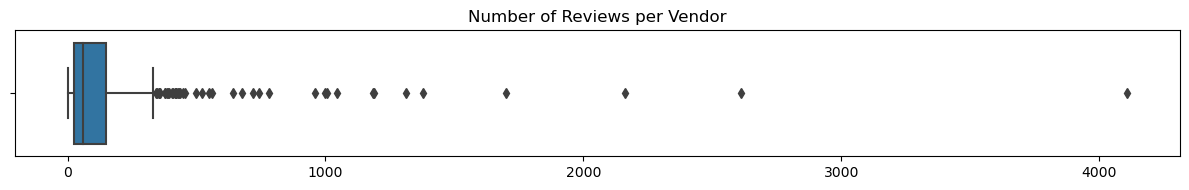


The proportion table for reviews looks as follows:

reviews
(-3.108, 411.7]     0.93
(411.7, 822.4]      0.04
(822.4, 1233.1]     0.01
(1233.1, 1643.8]    0.00
(1643.8, 2054.5]    0.00
(2054.5, 2465.2]    0.00
(2465.2, 2875.9]    0.00
(2875.9, 3286.6]    0.00
(3286.6, 3697.3]    0.00
(3697.3, 4108.0]    0.00
Name: proportion, dtype: float64



In [8]:
# specifying plot size
fig, ax = plt.subplots(figsize = [12, 2])

# plotting boxplot
sns.boxplot(data = df,
            x    = "reviews",
            )

# adjusting labels and plotting the visualization
plt.title(label = "Number of Reviews per Vendor")
plt.xlabel(xlabel = None)
plt.tight_layout()
plt.show()

# Identifying the frequencies of reviews
print(
f"""
The proportion table for reviews looks as follows:

{df["reviews"].value_counts(normalize = True,
                           sort      = False,
                           bins      = 10,
                           dropna    = False).round(decimals = 2)}
""")

The distribution of reviews is skewed to the right, as evident in the boxplot and frequency table above, implying that a few providers receive exponentially many reviews, as calculated below.

In [9]:
# Calculating the percentage share of the top 20 vendors by reviews
top_20_in_percent = 20/df.reviews.count()

# Calculating the percentage hold or reviews of the top 20 vendors
top_holds = df.reviews.sort_values(ascending = False).head(n = 20).sum() \
         /df.reviews.sum()

# Calculating the minimum reviews of the top 20 vendors
top_min = df.reviews.sort_values(ascending = False).head(n = 20).min()

# Calculating the avg_stars of the top 20 vendors
top_20_avg_stars = round( number = (df.loc[df["reviews"] >= top_min,
                                           "avg_stars"].mean()),
                          ndigits = 2)

# printing the results
print(f"Twenty vendors, i.e., the top \
{round(number = top_20_in_percent*100, ndigits = 2)}% of all vendors \
with the most reviews, hold \n{round(number = top_holds*100, ndigits = 2)}% \
of the total sample reviews with an average star rating of \
{top_20_avg_stars}.")

Twenty vendors, i.e., the top 4.52% of all vendors with the most reviews, hold 
37.56% of the total sample reviews with an average star rating of 4.24.



The proportion table for customer satisfaction, i.e., avg. stars, looks as follows:

avg_stars
(4.69, 5.0]                   0.72
(4.38, 4.69]                  0.12
(4.07, 4.38]                  0.08
(3.76, 4.07]                  0.03
(3.14, 3.45]                  0.02
(2.21, 2.52]                  0.01
(3.45, 3.76]                  0.01
(2.52, 2.83]                  0.01
(2.83, 3.14]                  0.00
(1.8960000000000001, 2.21]    0.00
Name: proportion, dtype: float64



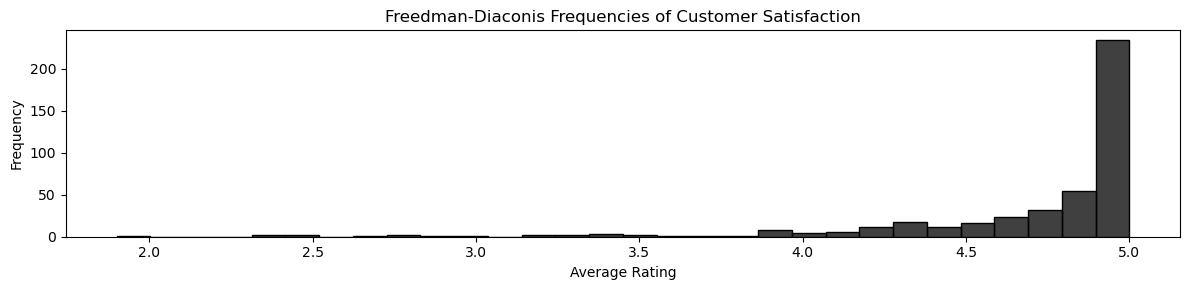

In [10]:
# Identifying the frequencies of avg_stars
print(
f"""
The proportion table for customer satisfaction, i.e., avg. stars, looks as follows:

{df["avg_stars"].value_counts(normalize = True,
                            sort      = True,
                            bins      = 10,
                            dropna    = False).round(decimals = 2)}
""")

# specifying plot size
fig, ax = plt.subplots(figsize = [12, 3])

# histogram for avg_stars
sns.histplot(data  = df,
             x     = "avg_stars",
             bins  = "fd",  # freedman-diaconis bins
             kde   = False, # drawing theoretical distribution
             color = 'black')


# adjusting labels and plotting the visualization
plt.title(label = "Freedman-Diaconis Frequencies of Customer Satisfaction")
plt.xlabel(xlabel = 'Average Rating')
plt.ylabel(ylabel = 'Frequency')
plt.tight_layout()
plt.show()

On the other hand, when looking into the histogram and frequency table of average vendor stars above, it is evident that most vendors get ratings beyond the 4.9 threshold, which implies that price may already not significantly affect customer satisfaction, which will be analyzed in the following.

In [11]:
# Creating correlation matrix
corr_avg_stars = pd.DataFrame(columns=["r","p"]) # correlation and p-value

# Correlating numerical data with avg_stars
for col in df:
    # assessing r and p for each column that is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        # spearman for categorical data
        r, p = stats.spearmanr(df.avg_stars, df[col])
        corr_avg_stars.loc[col] = [round(number = r, ndigits = 3),
                                   round(number = p, ndigits = 3)]

# Giving back the correlations and p-values for attributes of interest
corr_avg_stars.loc[("reviews","price_cat","affordable","moderate","luxury"),:]

,r,p
reviews,-0.415,0.000
price_cat,0.003,0.942
affordable,-0.039,0.409
moderate,0.027,0.574
luxury,-0.006,0.906


As illustrated in the table above, the data unequivocally indicates that no pricing category exhibits a statistically significant positive relationship with average customer satisfaction ratings compared to inexpensive vendors with p-values above 0.4.


What can be observed, however, is the fact that customer ratings are significantly negatively correlated with the number of reviews (-0.42). The following scatterplot takes a closer look at this.

/Users/Stefano Compagnone/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/Stefano Compagnone/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/tr/1q9q_z3j309g8478try7n2fr0000gn/T/ipykernel_67096/2152825709.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


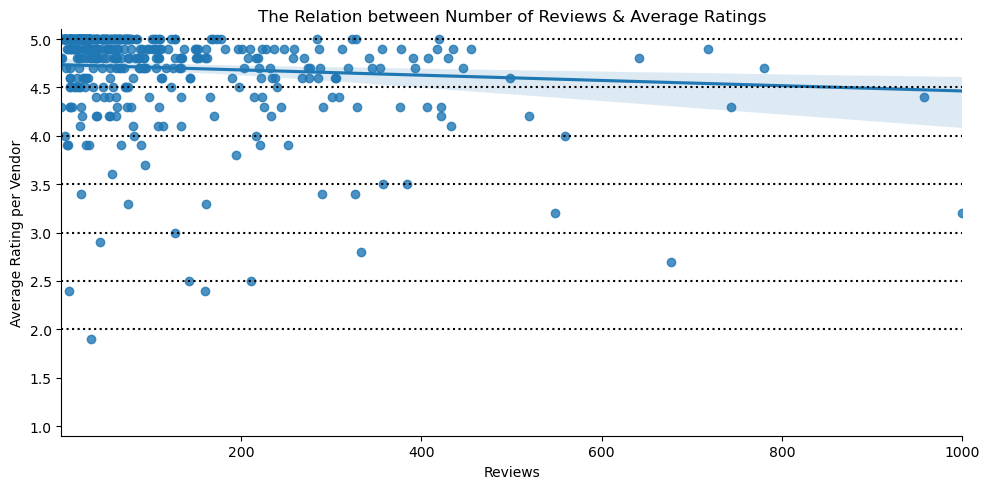

In [12]:
# instantiating a scatter plot for reviews and avg_star
sns.lmplot(x          = "reviews",    # x-axis feature
           y          = "avg_stars",  # y-axis feature
           hue        = None,         # categorical data for subsets
           legend     = True,         # including legend
           legend_out = False,        # formats legend if hue != None
           scatter    = True,         # renders a scatter plot
           fit_reg    = True,         # renders a regression line
           aspect     = 2,            # aspect ratio for plot
           data       = df)           # DataFrame where features exist

# looping over the y-range to save time
value = 2.0

while value <= 5:
    # making a horizontal line
    plt.axhline(y = value, color= "black", linestyle=":")
    
    # increasing value in increments
    value += 0.5


# adjusting labels and plotting the visualization
plt.title(label    = "The Relation between Number of Reviews & Average Ratings")
plt.xlabel(xlabel  = "Reviews")
plt.ylabel(ylabel  = "Average Rating per Vendor")
plt.xlim(1, 1000)  # changing the x-range for better viewability
plt.ylim(0.9, 5.1) # changing the y-range for better viewability
plt.tight_layout()
plt.show()

In fact, this is evident in the regression line. However, it is also clear that any observations deviate strongly from the regression line, which means that the number of ratings has only a marginal explanatory influence on the star rating.

In conclusion, a feature other than price needs to be analyzed to understand customer satisfaction.

<h2> Bibliography </h2>
    
Bigne, E., Ruiz, C., Perez-Cabañero, C., & Cuenca, A. (2023). Are customer star ratings and sentiments aligned? A deep learning study of the customer service experience in tourism destinations. Service Business, 17(1), 281–314. https://doi.org/10.1007/s11628-023-00524-0

Chen, T., Samaranayake, P., Cen, X., Qi, M., & Lan, Y. (2022). The impact of online reviews on consumers’ purchasing decisions: Evidence from an eye-tracking study. Frontiers in Psychology, 13, 865702. https://doi.org/10.3389/fpsyg.2022.865702

Parducci, A. (1965). Category judgment: A range-frequency model. Psychological Review, 72(6), 407–418. https://doi.org/10.1037/h0022602

Womply. (n.d.). Womply helps small businesses thrive in a digital world. https://www.womply.com/impact-of-online-reviews-on-small-business-revenue/#impactofreviews-section10--